## Basic Time Series Metrics & Resampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Compare the performance of several asset classes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


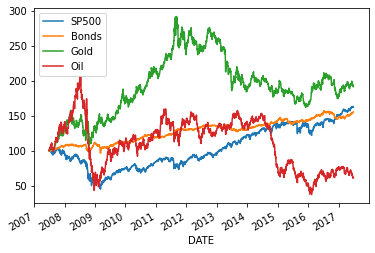

In [3]:

prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')


print(prices.info())


first_prices = prices.iloc[0]


normalized = prices.div(first_prices).mul(100)


normalized.plot()
plt.show()

In [4]:
first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

### Comparing stock prices with a benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


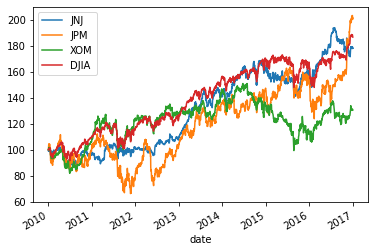

In [6]:

stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')


data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())


data.div(data.iloc[0]).mul(100).plot()
plt.show()

### Plot performance difference vs benchmark index

In [6]:

tickers = ['MSFT', 'AAPL']


stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')


sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')


data = pd.concat([stocks, sp500], axis=1).dropna()


normalized = data.div(data.iloc[0]).mul(100)

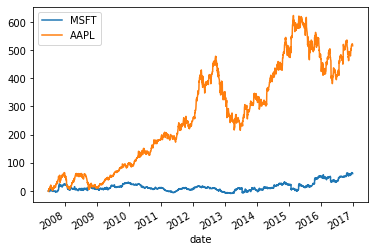

In [10]:

normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Convert monthly to weekly data

In [5]:

start = '2016-1-1'
end = '2016-2-29'


monthly_dates = pd.date_range(start=start, end=end, freq='M')


monthly = pd.Series(data=[1,2], index=monthly_dates)
print("monthly", monthly)
print()

weekly_dates = pd.date_range(start=start, end=end, freq='W')


print(monthly.reindex(weekly_dates))
print()
print(monthly.reindex(weekly_dates, method='bfill'))
print()
print(monthly.reindex(weekly_dates, method='ffill'))

monthly 2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [6]:
monthly_dates

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')

In [7]:
monthly_dates_ms = pd.date_range(start=start, end=end, freq='MS')
monthly_dates_ms

DatetimeIndex(['2016-01-01', '2016-02-01'], dtype='datetime64[ns]', freq='MS')

### Create weekly from monthly unemployment data

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


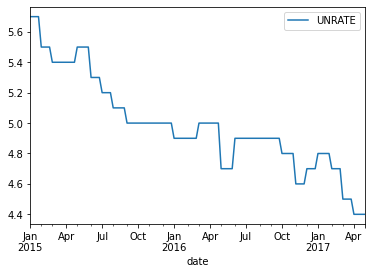

In [2]:

data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')


print(data.asfreq('W').head())


print(data.asfreq('W', method='bfill').head())


weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())


weekly_ffill.loc['2015':].plot()
plt.show()

### Use interpolation to create weekly employment data

In [6]:
monthly = data.resample('MS').ffill()

In [7]:
monthly

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2017-01-01,4.8
2017-02-01,4.7
2017-03-01,4.5


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB
None


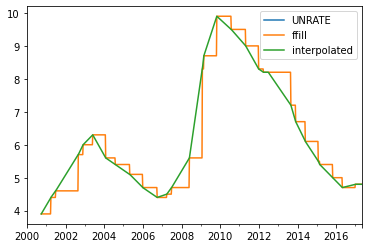

In [8]:

print(monthly.info())


weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')


weekly = monthly.reindex(weekly_dates)


weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()


weekly.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB
None


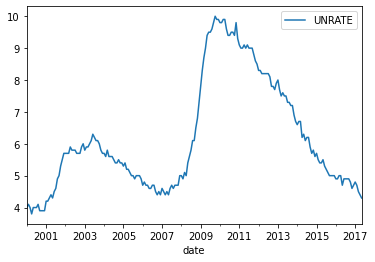

In [10]:

interpolated = data.interpolate()
print(interpolated.info())


interpolated.plot(secondary_y='Unemployment');
plt.show()

### Compare weekly, monthly and annual ozone trends for NYC & LA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
dtypes: float64(1)
memory usage: 98.7 KB


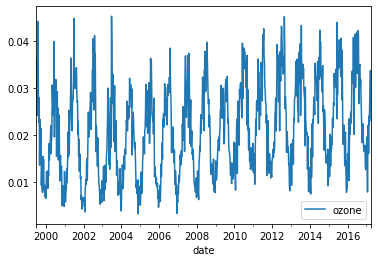

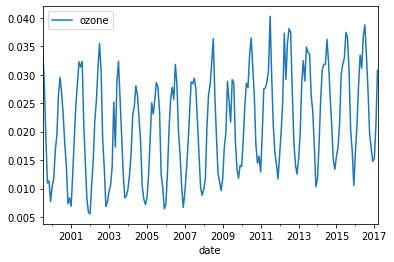

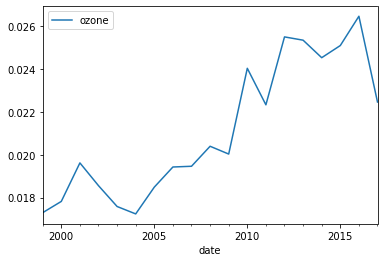

In [13]:

ozone = pd.read_csv('nyc.csv', parse_dates=['date'], index_col='date')[['ozone']]
ozone.info()


ozone.resample('W').mean().plot()
plt.show()


ozone.resample('M').mean().plot()
plt.show()



ozone.resample('A').mean().plot()
plt.show()

### Compare monthly average stock prices for Facebook and Google

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


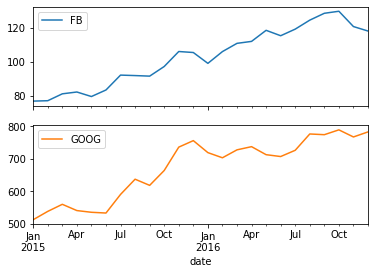

In [14]:

stocks = pd.read_csv('stocks.csv', parse_dates=['date'], index_col='date')
print(stocks.info())


monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

### Compare quarterly GDP growth rate and stock returns

In [ ]:

gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()


djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
djia.info()


djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)


data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show();